<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [59]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

<class 'urllib.error.URLError'>: <urlopen error [Errno 23] Host is unreachable>

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

In [44]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [45]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70 years


Text(0.5, 1.0, 'Median value of owner-occupied homes')

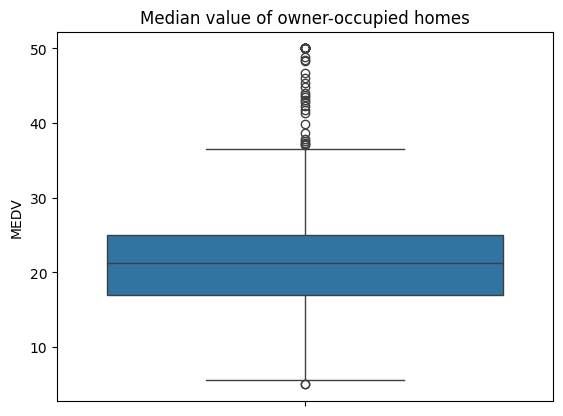

In [46]:
ax = sns.boxplot(y ='MEDV', data = boston_df)
ax.set_title('Median value of owner-occupied homes')

Text(0.5, 1.0, 'Charles river variable')

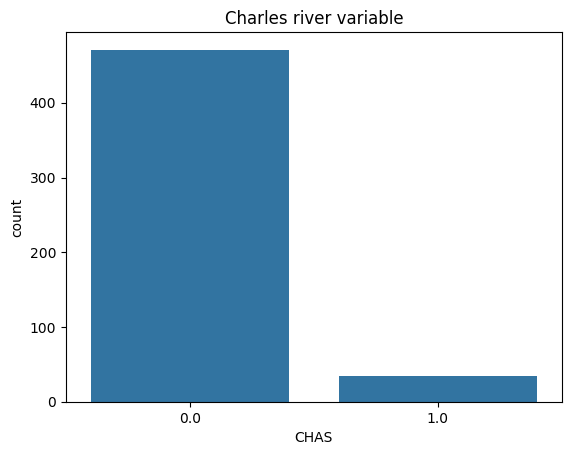

In [47]:
ax = sns.countplot(data = boston_df, x = 'CHAS')
ax.set_title("Charles river variable")

In [48]:
boston_df.loc[(boston_df['AGE']<=35), 'age_group'] = '35 years younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>= 70), 'age_group'] = '70 years and older'

Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

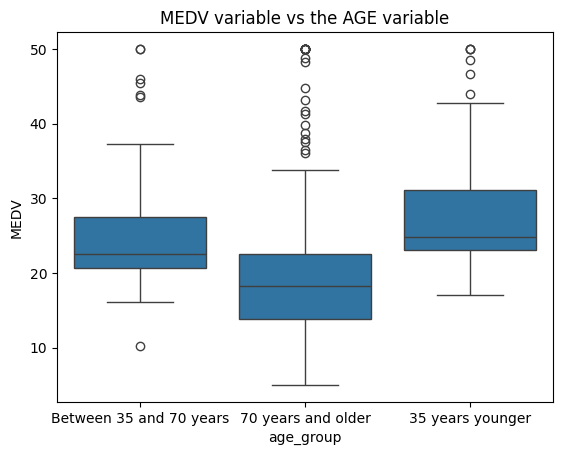

In [49]:
ax = sns.boxplot(data = boston_df, x = 'age_group', y = 'MEDV')
ax.set_title('MEDV variable vs the AGE variable')

Text(0.5, 1.0, 'Relationship between NOX and INDUS')

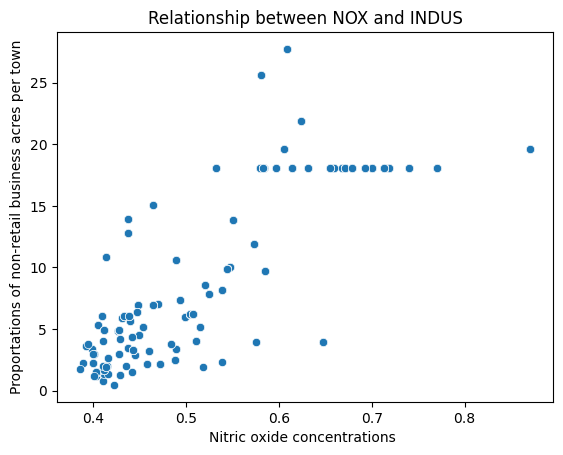

In [50]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
plt.xlabel("Nitric oxide concentrations ")
plt.ylabel("Proportations of non-retail business acres per town")
ax.set_title("Relationship between NOX and INDUS")

# From the scatterplot above. I am able to discern that the proportations of non-retail business acres per town is indictive of a positve upwards slope with the increase of nitric oxide concentrations. When the nitric oxide concentrations gets to 0.6, the proportations of non-retail business acres per town begin to level out.

Text(0.5, 1.0, 'Pupil to teacher ratio Histogram')

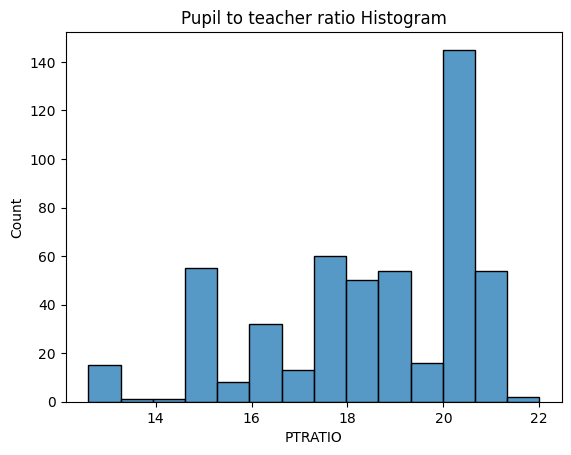

In [51]:
ax = sns.histplot(boston_df.PTRATIO)
ax.set_title("Pupil to teacher ratio Histogram")

In [52]:
import scipy.stats

Stating Hypothesis:

Null Hypothesis = There is no substantial difference in median value of the houses enclosed by the Charles River.

Alternate Hypothesis = There is notable difference in median value of houses enclosed by the Charles River.

Taking Alpha value = 0.05

In [53]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS']==0]['MEDV'])

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

As pvalue is less than 0.05. We fail to reject the null hypothesis and culminate to the conclusion that there is no significant difference in median value of houses enclosed by the Charles River.

Stating hypothesis: 

Null hypothesis = There is no substantial difference in Median Values of Houses (MEDV) for the proportion of owner occupied units built prior to 1940.

Alternate hypothesis = There is notable difference in Median Values of Houses (MEDV) for the proportion of owner occupied units built prior to 1940.

Taking alpha value = 0.05

In [54]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']["MEDV"]
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'Between 35 and 70 years'] ["MEDV"]
seventy_and_older = boston_df[boston_df['age_group'] == '70 years and older']["MEDV"]

In [55]:
 f_statistic,p_value = scipy.stats.f_oneway(thirtyfive_lower,thirtyfive_seventy,seventy_and_older)
print("F_Statistic: {},P_Value: {}".format(f_statistic,p_value))

<ipython-input-55-464cf2615d96>:1: DegenerateDataWarning: at least one input has length 0
  f_statistic,p_value = scipy.stats.f_oneway(thirtyfive_lower,thirtyfive_seventy,seventy_and_older)


F_Statistic: nan,P_Value: nan


In [56]:
correlation_coefficient,p_value = scipy.state.pearsonr(boston_df['NOX'],boston_df['INDUS'])
print("correlation_coefficient: {}p_value:{}".format(correlation_coefficient,p_value))

<class 'AttributeError'>: Module 'scipy' has no attribute 'state'

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [58]:
X = boston.df["DIS"]
Y = boston.df["MEDV"]
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
prediction = model.predict(X)
moedl.summary()

<class 'NameError'>: name 'boston' is not defined